In [ ]:
!pip install ipympl

In [1]:
%matplotlib notebook
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
with open('../ranking/log.txt') as pfile:
    plines = pfile.readlines()
    
    algs = ["CodeForces", "EloR", "Topcoder", "TrueSkill"]
    acc = [{}, {}, {}, {}]
    pct = [{}, {}, {}, {}]
    time = [{}, {}, {}, {}]
    alg_id = -1
    for line in plines:
        if 'performance' in line:
            alg_id += 1
            continue
        
        try:
            params, res = line.split(':')
            key = tuple([float(x) for x in params.split(',')])
            tokens = [tok.strip() for tok in res[:-2].split(',')]
            tup = eval(",".join(tokens[:2]))
            vals = [float(x) for x in tup] + [float(tokens[2])]
            acc[alg_id][key] = vals[0]
            pct[alg_id][key] = vals[1]
            time[alg_id][key] = vals[2]
        except:
            pass

In [37]:
for i in range(len(algs)):
    print('Algorithm type {} has best accuracy {} and average percentile deviation {}.'.format(algs[i], max(acc[i].values()), min(pct[i].values())))

Algorithm type CodeForces has best accuracy 0.8917473473473473 and average percentile deviation 0.07573500000000008.
Algorithm type EloR has best accuracy 0.8920062062062062 and average percentile deviation 0.07556200000000012.
Algorithm type Topcoder has best accuracy 0.8918142142142143 and average percentile deviation 0.0756506000000001.
Algorithm type TrueSkill has best accuracy 0.8857073073073073 and average percentile deviation 0.08053920000000012.


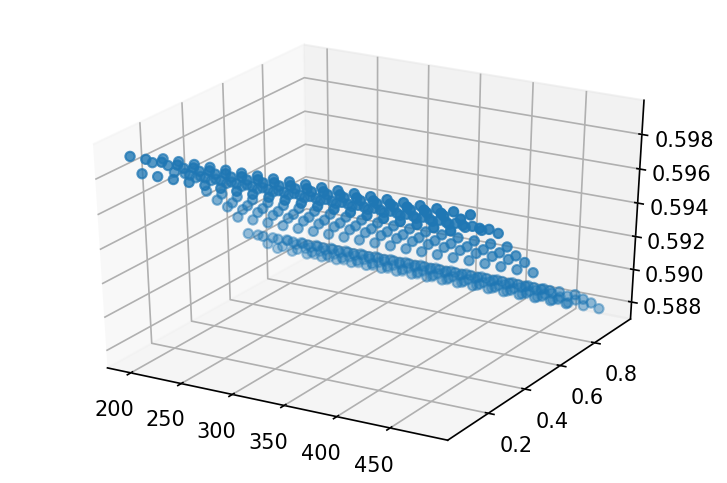

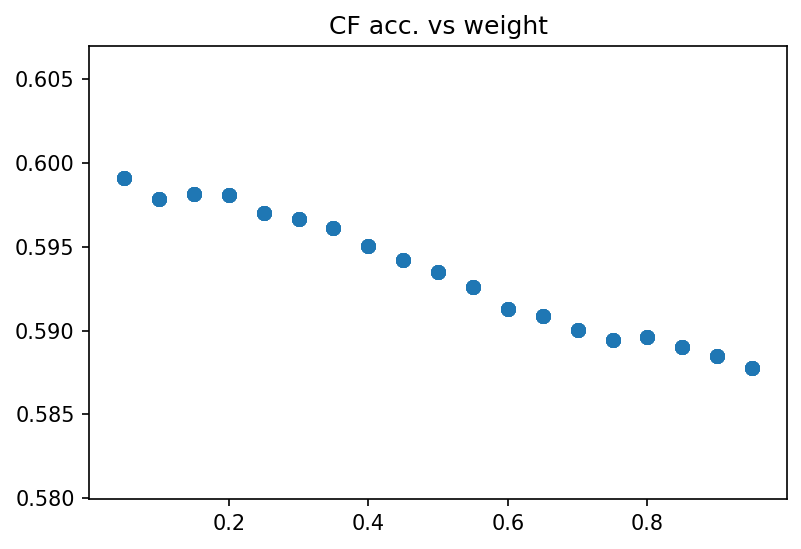

In [21]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Codeforces
############
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = zip(*list(acc[0].keys()))
z = list(acc[0].values())
ax.scatter(x, y, z)
plt.show()

# From the plot above, it seems like sig_perf has no effect on codeforces

plt.title("CF acc. vs weight")
plt.scatter(y, z)
plt.show()

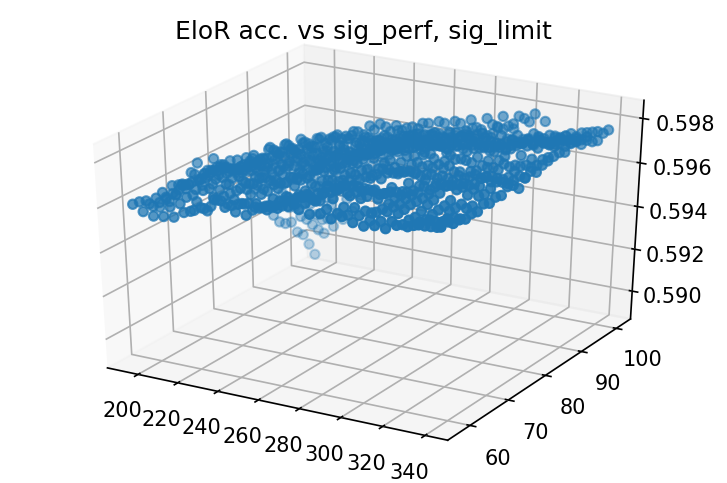

In [22]:
# EloR
######
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = zip(*list(acc[1].keys()))
z = list(acc[1].values())
ax.scatter(x, y, z)
ax.set_title("EloR acc. vs sig_perf, sig_limit")
plt.show()

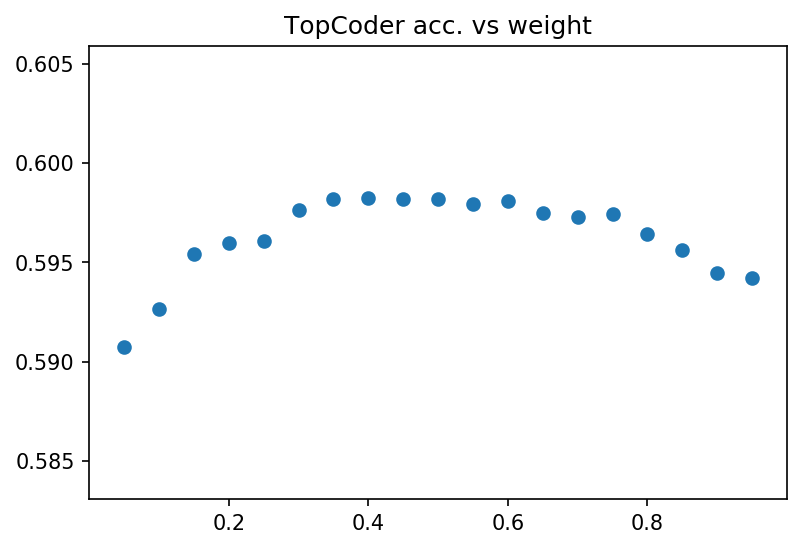

In [23]:
# TopCoder
##########
y = list(acc[2].keys())
z = list(acc[2].values())
plt.scatter(y, z)
plt.title("TopCoder acc. vs weight")
plt.show()

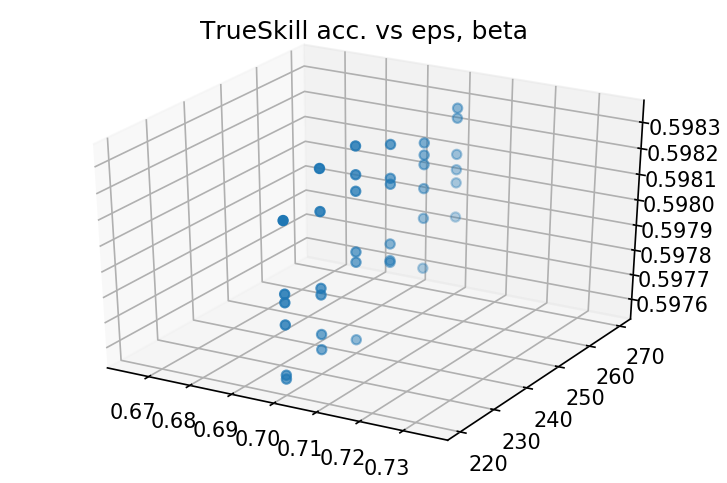

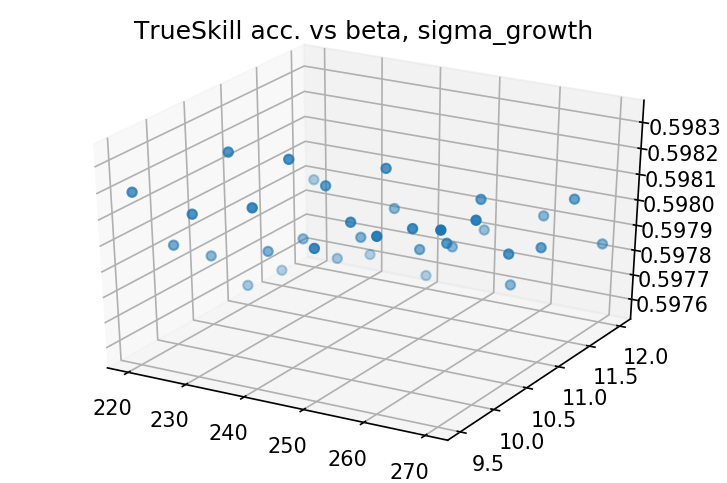

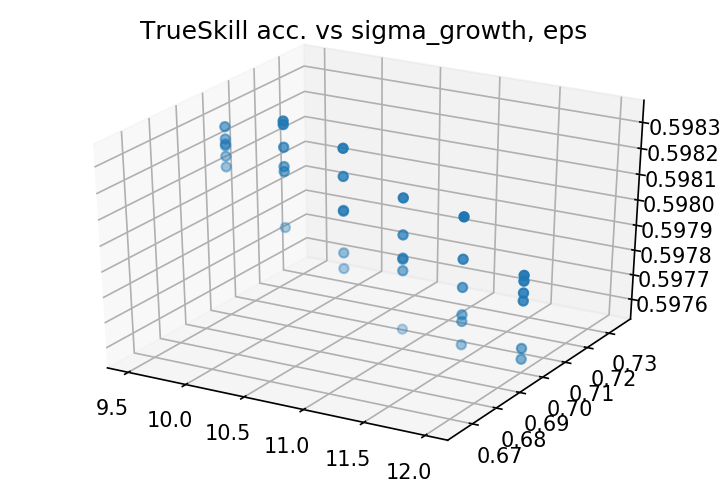

In [24]:
# TrueSkill
###########
eps, beta, sigma_growth = zip(*list(acc[3].keys()))
z = list(acc[3].values())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eps, beta, z)
ax.set_title("TrueSkill acc. vs eps, beta")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta, sigma_growth, z)
ax.set_title("TrueSkill acc. vs beta, sigma_growth")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sigma_growth, eps, z)
ax.set_title("TrueSkill acc. vs sigma_growth, eps")
plt.show()

# Seems fairly insensitive to sigma growth